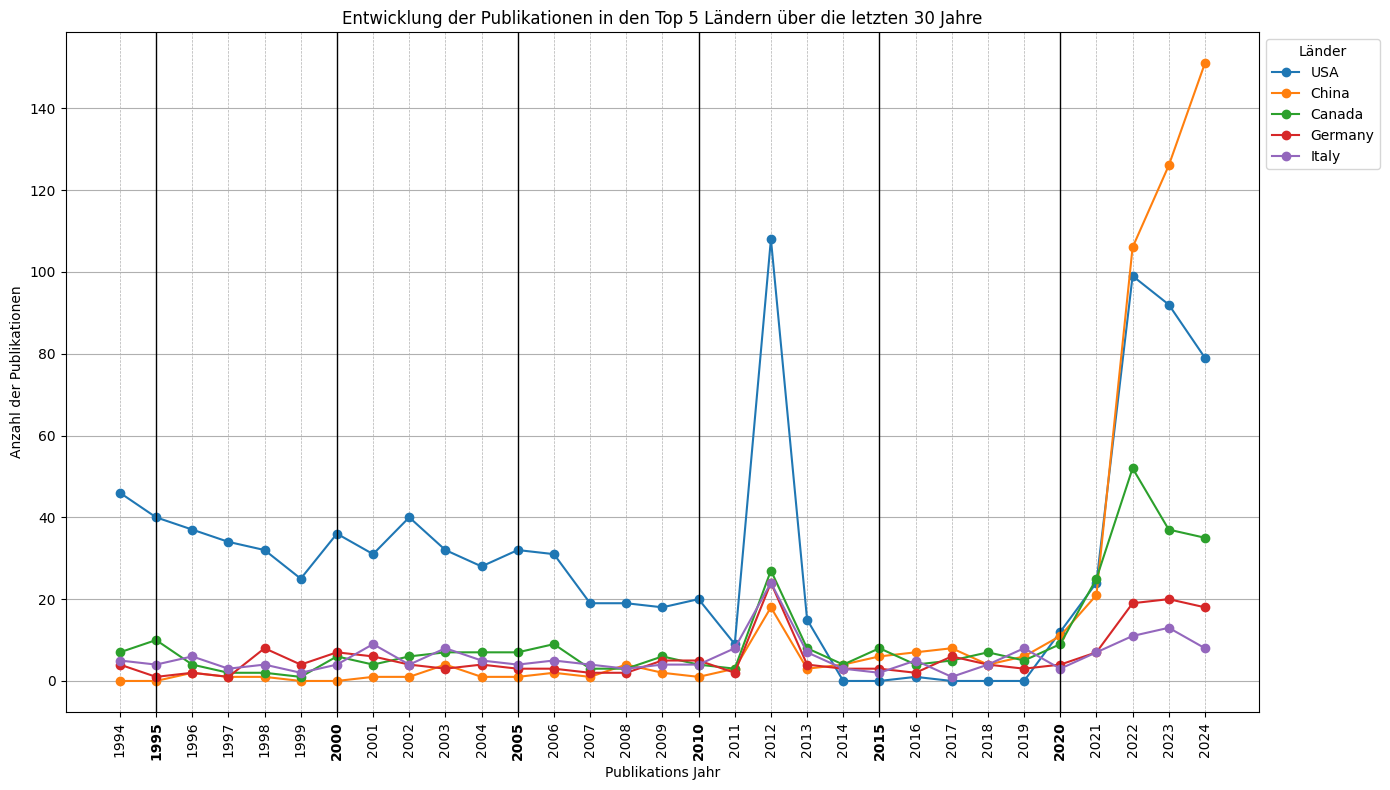

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

# Länder aus der "Author Affiliations"-Spalte extrahieren (angenommen, sie ist vorhanden)
# Es wird angenommen, dass das letzte Komma-getrennte Element in der Spalte das Land ist.
df['Country'] = df['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# 'Publication Year' in einen numerischen Typ umwandeln (Fehlerhafte Werte ignorieren)
df['Publication Year'] = pd.to_numeric(df['Publication Year'], errors='coerce')

# Daten filtern: Nur Veröffentlichungen bis 2024 berücksichtigen
df = df[df['Publication Year'] <= 2024]

# 3. Zählen der Veröffentlichungen pro Jahr und pro Land
year_country_counts = df.groupby(['Publication Year', 'Country']).size().unstack(fill_value=0)

# 4. Top 5 Länder basierend auf Gesamtpublikationen identifizieren
top_5_countries = year_country_counts.sum().sort_values(ascending=False).head(5).index

# 5. Entwicklung der Veröffentlichungen für die Top 5 Länder
plt.figure(figsize=(14, 8))
for country in top_5_countries:
    plt.plot(year_country_counts.index, year_country_counts[country], label=country, marker='o')

# Anpassung der X-Achse
years = year_country_counts.index.astype(int)  # Ensure years are integers
plt.xticks(
    ticks=years,  # Alle Jahre anzeigen
    labels=[str(year) if year % 5 == 0 else year for year in years],  # Nur alle 5 Jahre beschriften
    rotation=90,
    fontsize=10  # Schriftgröße für die Jahre
)
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)  # Hilfslinien

# Individuelle Anpassung der Schriftstärke für 5er-Schritte
ax = plt.gca()
for label in ax.get_xticklabels():
    year = int(label.get_text())  # Jahr als Integer
    if year % 5 == 0:
        label.set_fontweight('bold')  # Fett für 5er-Schritte


# Zusätzliche Markierung und dicke Striche bei jedem fünften Jahr
for year in years:
    if year % 5 == 0:
        plt.axvline(x=year, color='black', linestyle='-', linewidth=1)  # Dicke Linie bei jedem fünften Jahr

# Achsentitel und Diagrammtitel
plt.xlabel('Publikations Jahr')
plt.ylabel('Anzahl der Publikationen')
plt.title('Entwicklung der Publikationen in den Top 5 Ländern über die letzten 30 Jahre')
plt.legend(title="Länder", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()

# Liniendiagramm zeigen
plt.show()
